### 1. Problem statement
 - We are given United Airline stock price from 01/2012 to 12/2017. 
 - The task is to predict the trend of the stock price for 01-06 2018. 

 - Test set -> UA stock from 2019-01-01 to 2020-12-31

### 2. Import library

In [491]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from keras.layers import Dense,GlobalAveragePooling2D, Input

### 3. Data processing

#### 3.0 import the data

In [492]:
df = pd.read_csv('DAL.csv')
length = df.shape[0]
# dataset_train = df[int(length*0.7):int(length*0.9)].copy()
dataset_train = df[ :int(length*0.9)].copy()
# dataset_train = pd.read_csv('American_Airlines.csv')
# dataset_train = pd.read_csv('Delta_Air_Lines.csv')

In [493]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,11.22,11.43,10.95,11.22,9.966127,14482500
1,2010-01-05,11.32,12.34,11.29,12.10,10.747787,25066000
2,2010-01-06,11.99,12.24,11.85,12.11,10.756668,14980700
3,2010-01-07,12.06,12.86,12.05,12.69,11.271852,19814500
4,2010-01-08,12.62,12.85,12.05,12.47,11.076437,24589200


In [494]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values
print(training_set)

[[11.22000027]
 [11.31999969]
 [11.98999977]
 ...
 [31.37999916]
 [31.39999962]
 [31.70000076]]


In [495]:
training_set.shape

(2718, 1)

#### 3.1 Feature scaling

In [496]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)
print(len(training_set_scaled))

2718


#### 3.2 Data structure creation

- taking the reference of past 60 days of data to predict the future stock price.  
- It is observed that taking 60 days of past data gives us best results.  
- In this data set 60 days of data means 3 months of data.  
- Every month as 20 days of Stock price.   
- X train will have data of 60 days prior to our date and y train will have data of one day after our date

In [497]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [498]:
X_train.shape

(2658, 60)

In [499]:
# # Class outcome
# cutoff = 0.5
# X_outcome = np.array([0 if x < cutoff else 1 for x in np.cumsum(X_train[443])])
# print(X_outcome)

In [500]:
y_train.shape

(2658,)

#### 3.3 Data reshaping

In [501]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2658, 60, 1)

1. Number of stock prices - 1449  
2. Number of time steps - 60  
3. Number of Indicator - 1  

### 4. Create & Fit Model

#### 4.1 Create model

## CNN LSTM

In [502]:
# model = Sequential()
#add model layers
# inputs = Input(shape=(X_train.shape[1]))
# model.add(TimeDistributed(Conv1D(128, kernel_size=1, activation='relu', batch_input_shape=(None, X_train.shape[1]))))
# model.add(TimeDistributed(MaxPooling1D(2)))
# model.add(TimeDistributed(Conv1D(256, kernel_size=1, activation='relu')))
# model.add(TimeDistributed(MaxPooling1D(2)))
# model.add(TimeDistributed(Conv1D(512, kernel_size=1, activation='relu')))
# model.add(TimeDistributed(MaxPooling1D(2)))
# model.add(TimeDistributed(Flatten()))
# model.add(LSTM(200,return_sequences=True))
# model.add(Dropout(0.25))
# model.add(Bidirectional(LSTM(200,return_sequences=False)))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='linear'))
# model.compile(optimizer='adam', loss='mse')

# model.add((Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1))))
# model.add((MaxPooling1D(2)))
# # model.add((Flatten()))
# # model.add(Dropout(0.5))
# model.add(LSTM(200,return_sequences=False))
# model.add(Dropout(0.25))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='relu'))
# model.compile(optimizer='adam', loss='mse')



# model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)
# print(model.summary())

## CNN BiLSTM

In [517]:
model = Sequential()
#add model layers

model.add((Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1))))
model.add((MaxPooling1D(2)))
# model.add((Flatten()))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(200,return_sequences=False)))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer='adam', loss='mse')



model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)
print(model.summary())

Epoch 1/100
84/84 [==============================] - 13s 99ms/step - loss: 0.0138
Epoch 2/100
84/84 [==============================] - 8s 89ms/step - loss: 0.0031
Epoch 3/100
84/84 [==============================] - 7s 86ms/step - loss: 0.0047
Epoch 4/100
84/84 [==============================] - 7s 85ms/step - loss: 0.0029
Epoch 5/100
84/84 [==============================] - 8s 93ms/step - loss: 0.0023
Epoch 6/100
84/84 [==============================] - 7s 88ms/step - loss: 0.0021
Epoch 7/100
84/84 [==============================] - 7s 86ms/step - loss: 0.0019
Epoch 8/100
84/84 [==============================] - 7s 87ms/step - loss: 0.0019
Epoch 9/100
84/84 [==============================] - 8s 91ms/step - loss: 0.0018
Epoch 10/100
84/84 [==============================] - 12s 146ms/step - loss: 0.0016
Epoch 11/100
84/84 [==============================] - 10s 112ms/step - loss: 0.0016
Epoch 12/100
84/84 [==============================] - 7s 78ms/step - loss: 0.0014
Epoch 13/100
84/84 [

In [518]:
model.save("DAL-CNN-BiLSTM")

INFO:tensorflow:Assets written to: DAL-CNN-BiLSTM/assets


INFO:tensorflow:Assets written to: DAL-CNN-BiLSTM/assets


#### 4.3 Model evaluation

In [519]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_45 (Conv1D)          (None, 58, 128)           512       
                                                                 
 max_pooling1d_45 (MaxPoolin  (None, 29, 128)          0         
 g1D)                                                            
                                                                 
 dropout_45 (Dropout)        (None, 29, 128)           0         
                                                                 
 bidirectional_18 (Bidirecti  (None, 400)              526400    
 onal)                                                           
                                                                 
 dropout_46 (Dropout)        (None, 400)               0         
                                                                 
 dense_69 (Dense)            (None, 128)             

#### 4.3.1 Read and convert

In [520]:
# dataset_test = pd.read_csv('UAL_test.csv')
# dataset_test = df[int(length*0.9):int(length*0.95)].copy()
dataset_test = df[int(length*0.9):int(length)].copy()
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 2718 to 3019
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       302 non-null    object 
 1   Open       302 non-null    float64
 2   High       302 non-null    float64
 3   Low        302 non-null    float64
 4   Close      302 non-null    float64
 5   Adj Close  302 non-null    float64
 6   Volume     302 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 16.6+ KB


In [521]:
dataset_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2718,2020-10-20,31.969999,32.410000,31.590000,31.980000,31.980000,14244300
2719,2020-10-21,31.889999,31.940001,31.370001,31.500000,31.500000,11292300
2720,2020-10-22,31.870001,33.810001,31.719999,33.720001,33.720001,25713700
2721,2020-10-23,33.520000,34.040001,32.900002,34.000000,34.000000,15247300
2722,2020-10-26,33.500000,33.500000,31.530001,31.930000,31.930000,16558300


In [522]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
print(real_stock_price.shape)
print(real_stock_price[0])

(302, 1)
[31.96999931]


#### 4.3.2 Concat and convert

In [523]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), 
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

#### 4.3.3 Reshape and scale

In [524]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [525]:
len(inputs)
print(inputs.shape)

(362, 1)


#### 4.3.4 Create test data strucutre

In [526]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [527]:
# X_test = np.expand_dims(X_test, axis=1)
# X_test = X_test.reshape(X_test[0], X_test[1]*X_test[2])
X_test.shape
# print(X_test)

(302, 60, 1)

#### 4.3.5 Model prediction

In [528]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = np.ndarray.flatten(predicted_stock_price)
predicted_stock_price = predicted_stock_price.reshape(-1, 1)

In [529]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#### 4.3.6 Result visualization

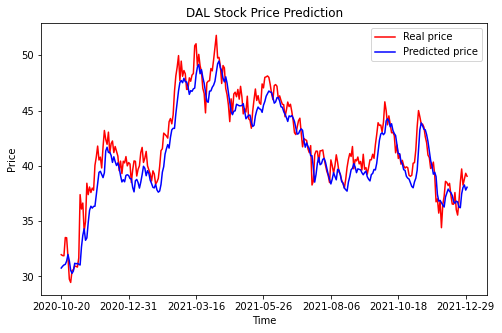

MSE: 2.34906804699416
MAE: 1.1879393154422178
R^2: 0.8738606760164237


In [530]:
date = df['Date'].iloc[int(length*0.9):int(length)].values

plt.figure(figsize=(8,5))
plt.plot(date, real_stock_price, color = 'red', label = 'Real price')
plt.plot(date, predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('DAL Stock Price Prediction')
plt.xticks(np.arange(0,len(predicted_stock_price),50))
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
print(f'MSE: {mean_squared_error(real_stock_price, predicted_stock_price)}')
print(f'MAE: {mean_absolute_error(real_stock_price, predicted_stock_price)}')
print(f'R^2: {r2_score(real_stock_price, predicted_stock_price)}')